In [1]:
!pip install datasets
!pip install transformers
!pip install peft
!pip install accelerate
!pip install bitsandbytes
!pip install huggingface_hub

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 12.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver

In [2]:
pip install --upgrade bitsandbytes


In [3]:
#huggingface login
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
The token `absa3` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate wh

In [4]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import os
import ast
import torch

from datasets import load_dataset
from transformers import (
    LlamaForCausalLM,
    LlamaTokenizer,
    Trainer,
    TrainingArguments,
    BitsAndBytesConfig
)
from peft import LoraConfig, get_peft_model, TaskType

In [29]:
import pandas as pd

In [30]:
def load_data():
    # Example: using local CSV files. Adjust these paths to your own.
    # If you already have your data as a Hugging Face DatasetDict, skip this step.
    dataset = load_dataset("csv", data_files={
        "train": "/content/drive/MyDrive/T5_finetuning/Dataset2/Laptop2014/Train/Laptops2014_Train_Formatted.csv",
        "validation": "/content/drive/MyDrive/T5_finetuning/Dataset2/Laptop2014/Trial/laptops_Trial_Formatted.csv",
        "test": "/content/drive/MyDrive/T5_finetuning/Dataset2/Laptop2014/Test/Laptops_Test_Gold_Formatted.csv"
    })

    return dataset

In [31]:
def format_aspect_pairs(aspect_str):
    # If there are no aspect terms
    if aspect_str == "noaspectterms":
        return "noaspectterms"

    # Otherwise parse the string into a list of dicts
    try:
        data = ast.literal_eval(aspect_str)
    except:
        # If there's an error in parsing, return 'noaspectterms' or handle differently
        return "noaspectterms"

    lines = []
    for item in data:
        term = item.get('term', '')
        polarity = item.get('polarity', '')
        lines.append(f"{term}:{polarity}")
    return "\n".join(lines)

In [32]:
def create_prompt_and_response(ex):
    raw_text = ex["raw_text"]
    aspects_str = ex["aspectTerms"]

    # Build the prompt
    prompt = (
        "Below is a product/service-related text. "
        "Identify any aspects and their sentiment polarity.\n"
        "Return the result as 'aspect:polarity' pairs. If none exist, return 'noaspectterms'.\n\n"
        f"Text:\n{raw_text}\n\nAnswer:\n"
    )

    # Build the response
    answer = format_aspect_pairs(aspects_str)

    return {
        "input_text": prompt,
        "target_text": answer
    }

In [33]:
def tokenize_fn(examples, tokenizer, max_length=512):
    inputs = []
    for prompt, ans in zip(examples["input_text"], examples["target_text"]):
        # Combine them
        full_text = prompt + ans
        inputs.append(full_text)

    tokenized = tokenizer(
        inputs,
        max_length=max_length,
        truncation=True,
        padding="max_length"
    )

    # For causal LM, labels are the same as input_ids by default
    tokenized["labels"] = tokenized["input_ids"].copy()
    return tokenized


In [34]:
def get_llama_model_and_tokenizer(model_id="meta-llama/Llama-2-7b-hf"):
    # Configure 4-bit quantization
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.float16
    )

    tokenizer = LlamaTokenizer.from_pretrained(model_id)
    # Set pad_token = eos_token if not already set
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    base_model = LlamaForCausalLM.from_pretrained(
        model_id,
        quantization_config=bnb_config,
        device_map="auto"
    )

    return base_model, tokenizer

In [35]:
def apply_qlora(base_model):
    lora_config = LoraConfig(
        r=16,
        lora_alpha=32,
        target_modules=["q_proj", "k_proj", "v_proj", "o_proj"],
        lora_dropout=0.05,
        bias="none",
        task_type=TaskType.CAUSAL_LM
    )

    peft_model = get_peft_model(base_model, lora_config)
    peft_model.print_trainable_parameters()
    return peft_model

In [36]:
def train_model(model, tokenizer, dataset, output_dir="/content/drive/MyDrive/GPTo3-mini-llama2-7b/JointTask/Output/llama2-7b-qlora-aspect-sentiment"):
    # Map dataset to prompt/response
    dataset = dataset.map(create_prompt_and_response)

    # Tokenize
    def collate_fn(examples):
        return tokenize_fn(examples, tokenizer, max_length=512)

    # It's usually better to use .map(...) to tokenize rather than collate_fn,
    # but we'll do a simple approach here.
    tokenized_dataset = dataset.map(
        lambda x: collate_fn(x), batched=True, remove_columns=dataset["train"].column_names
    )

    train_dataset = tokenized_dataset["train"]
    eval_dataset = tokenized_dataset["validation"]

    # Set up training args
    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=3,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        evaluation_strategy="steps",
        eval_steps=100,
        logging_steps=50,
        save_steps=200,
        save_total_limit=2,
        learning_rate=2e-4,
        fp16=True,
        report_to="none"  # or "tensorboard" etc.
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset
    )

    trainer.train()
    return trainer

In [77]:
def predict_aspects(model, tokenizer, text):
    prompt = (
        "Below is a product/service-related text. "
        "Identify any aspects and their sentiment polarity.\n"
        "Return the result as 'aspect:polarity' pairs. If none exist, return 'noaspectterms'.\n\n"
        f"Text:\n{text}\n\nAnswer:\n"
    )
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    with torch.no_grad():
        generation = model.generate(
            **inputs,
            max_new_tokens=50,
            do_sample=True,
            top_p=0.9,
            temperature=0.7,
        )
    output = tokenizer.decode(generation[0], skip_special_tokens=True)

    # Extract content after 'Answer:'
    if "Answer:" in output:
        output = output.split("Answer:", 1)[1]

    # Remove only leading whitespace on the first line
    output_lines = output.split("\n")
    if len(output_lines) > 1:
        # apply .lstrip() to only the second line
        output_lines[1] = output_lines[1].lstrip()
    output = "\n".join(output_lines)



    return output


In [38]:
def main():
    # 1. Load Data
    dataset = load_data()  # modifies this for your actual data

    # 2. Load Base Model and Tokenizer
    base_model, tokenizer = get_llama_model_and_tokenizer()

    # 3. Apply QLoRA
    qlora_model = apply_qlora(base_model)

    # 4. Train
    trainer = train_model(qlora_model, tokenizer, dataset)

    # 5. Inference Example
    test_text = "I love the screen clarity but the speakers are disappointing."  # sample text

    # Merging LoRA weights is optional. If you want to merge:
    # qlora_model = qlora_model.merge_and_unload()

    # Predict aspects
    prediction = predict_aspects(qlora_model, tokenizer, test_text)
    print("Prediction:\n", prediction)


if __name__ == "__main__":
    main()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

trainable params: 16,777,216 || all params: 6,755,192,832 || trainable%: 0.2484


Map:   0%|          | 0/3048 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/3048 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Prediction:
 screen clarity:positive
speakers:negative


In [58]:
import torch
from peft import PeftModel
from transformers import LlamaForCausalLM, LlamaTokenizer, BitsAndBytesConfig

# 1. Load base model in 4-bit or 8-bit
base_model_id = "meta-llama/Llama-2-7b-hf"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)
base_model = LlamaForCausalLM.from_pretrained(
    base_model_id,
    quantization_config=bnb_config,
    device_map="auto"
)

tokenizer = LlamaTokenizer.from_pretrained(base_model_id)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# 2. Load LoRA adapter
# Point this to wherever your Trainer saved the fine-tuned model
lora_model_path = "/content/drive/MyDrive/GPTo3-mini-llama2-7b/JointTask/Output/llama2-7b-qlora-aspect-sentiment/checkpoint-4400"
model = PeftModel.from_pretrained(
    base_model,
    lora_model_path,
    device_map="auto"
)

# Now 'model' contains the base + LoRA weights


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [78]:
# Example usage:
test_text = "The receiver was full of superlatives for the quality and performance."
prediction = predict_aspects(model, tokenizer, test_text)
print("Prediction:\n", prediction)


Prediction:
 
receiver:positive
quality:positive
performance:positive


In [81]:
import ast

def parse_gold_aspect_pairs(aspect_str):
    # If no aspects
    if aspect_str == "noaspectterms":
        return set()

    try:
        # Convert string of list-dict to Python objects
        data = ast.literal_eval(aspect_str)
    except:
        # If something fails, treat as no aspects
        return set()

    aspect_set = set()
    for d in data:
        term = d.get('term', '').strip().lower()
        polarity = d.get('polarity', '').strip().lower()
        aspect_set.add((term, polarity))
    return aspect_set

def parse_pred_aspect_pairs(pred_str):
    lines = pred_str.strip().splitlines()

    # If the entire prediction is literally "noaspectterms"
    if len(lines) == 1 and lines[0].strip().lower() == "noaspectterms":
        return set()

    aspect_set = set()
    for line in lines:
        line = line.strip()
        if not line:
            continue
        if ':' in line:
            aspect, polarity = line.split(':', 1)
            aspect_set.add((aspect.strip().lower(), polarity.strip().lower()))
    return aspect_set


def evaluate_on_test(test_dataset, model, tokenizer):
    y_true_sets = []
    y_pred_sets = []

    for ex in test_dataset:
        # parse the gold label
        gold_set = parse_gold_aspect_pairs(ex['aspectTerms'])
        y_true_sets.append(gold_set)

        # run inference
        pred_str = predict_aspects(model, tokenizer, ex['raw_text'])
        pred_set = parse_pred_aspect_pairs(pred_str)
        y_pred_sets.append(pred_set)

    # Now compute metrics
    results = compute_metrics(y_true_sets, y_pred_sets)
    return results

def compute_exact_match_accuracy(y_true_sets, y_pred_sets):
    assert len(y_true_sets) == len(y_pred_sets)
    correct = 0
    for gold_set, pred_set in zip(y_true_sets, y_pred_sets):
        if gold_set == pred_set:
            correct += 1
    accuracy = correct / len(y_true_sets)
    return accuracy

def compute_micro_stats(y_true_sets, y_pred_sets):
    tp = 0
    total_gold = 0
    total_pred = 0

    for gold_set, pred_set in zip(y_true_sets, y_pred_sets):
        tp += len(gold_set.intersection(pred_set))
        total_gold += len(gold_set)
        total_pred += len(pred_set)

    precision = tp / total_pred if total_pred > 0 else 0.0
    recall = tp / total_gold if total_gold > 0 else 0.0
    if precision + recall == 0:
        f1 = 0.0
    else:
        f1 = 2 * precision * recall / (precision + recall)

    return precision, recall, f1


def compute_metrics(y_true_sets, y_pred_sets):
    accuracy = compute_exact_match_accuracy(y_true_sets, y_pred_sets)
    precision, recall, f1 = compute_micro_stats(y_true_sets, y_pred_sets)
    return {
        "accuracy_exact_match": accuracy,
        "precision_micro": precision,
        "recall_micro": recall,
        "f1_micro": f1
    }



def evaluate_on_test(test_dataset, model, tokenizer):
    y_true_sets = []
    y_pred_sets = []

    for ex in test_dataset:
        # parse gold
        gold_set = parse_gold_aspect_pairs(ex['aspectTerms'])
        y_true_sets.append(gold_set)

        # predict
        pred_output = predict_aspects(model, tokenizer, ex['raw_text'])  # from your code
        pred_set = parse_pred_aspect_pairs(pred_output)
        y_pred_sets.append(pred_set)

    # compute
    results = compute_metrics(y_true_sets, y_pred_sets)
    return results


In [83]:
results = evaluate_on_test(dataset['test'], model, tokenizer)
print(results)


{'accuracy_exact_match': 0.77375, 'precision_micro': 0.7212020033388982, 'recall_micro': 0.6615620214395099, 'f1_micro': 0.6900958466453674}


*   'accuracy_exact_match': 0.77375,
*   'precision_micro': 0.7212020033388982,
*   'recall_micro': 0.6615620214395099,
*   'f1_micro': 0.6900958466453674








In [84]:
import math
def compute_perplexity(loss):
    return math.exp(loss)


In [86]:
import numpy as np

labels = ["noaspect", "positive", "negative", "neutral", "conflict"]
label2idx = {lab: i for i, lab in enumerate(labels)}


In [87]:
import ast

def parse_gold_aspect_pairs(aspect_str):
    # If no aspects in gold
    if aspect_str.strip().lower() == "noaspectterms":
        return set()

    try:
        data = ast.literal_eval(aspect_str)
    except:
        return set()

    aspect_set = set()
    for d in data:
        term = d.get('term', '').lower().strip()
        polarity = d.get('polarity', '').lower().strip()

        # For safety, ensure it‚Äôs in your known polarity set
        if polarity not in ["positive","negative","neutral","conflict"]:
            # If it's some unknown label, you could skip or treat differently
            polarity = "noaspect"

        aspect_set.add((term, polarity))
    return aspect_set

def parse_pred_aspect_pairs(pred_str):
    # If the entire prediction is 'noaspectterms'
    if pred_str.strip().lower() == "noaspectterms":
        return set()

    lines = pred_str.strip().splitlines()
    aspect_set = set()
    for line in lines:
        line = line.strip()
        if not line:
            continue
        if ':' in line:
            aspect, polarity = line.split(':', 1)
            aspect = aspect.lower().strip()
            polarity = polarity.lower().strip()

            if polarity not in ["positive","negative","neutral","conflict"]:
                polarity = "noaspect"

            aspect_set.add((aspect, polarity))
    return aspect_set


In [88]:
def build_confusion_matrix_aspect_polarity(y_true_sets, y_pred_sets):
    """
    y_true_sets, y_pred_sets: lists of sets, each set is {(aspect, polarity), ...}.
    We'll produce a 5x5 matrix for the polarities: noaspect, positive, negative, neutral, conflict.
    """
    cm = np.zeros((len(labels), len(labels)), dtype=int)

    for gold_set, pred_set in zip(y_true_sets, y_pred_sets):
        # 1. For every gold aspect
        for (g_aspect, g_pol) in gold_set:
            found_match = False
            for (p_aspect, p_pol) in pred_set:
                if p_aspect == g_aspect:
                    # we have the same aspect, so count it
                    found_match = True
                    i = label2idx[g_pol]  # gold polarity index
                    j = label2idx[p_pol]  # predicted polarity index
                    cm[i, j] += 1
                    break
            if not found_match:
                # aspect was not predicted at all
                i = label2idx[g_pol]
                j = label2idx["noaspect"]
                cm[i, j] += 1

        # 2. For every predicted aspect that wasn't in gold
        for (p_aspect, p_pol) in pred_set:
            is_extra = True
            for (g_aspect, g_pol) in gold_set:
                if p_aspect == g_aspect:
                    is_extra = False
                    break
            if is_extra:
                i = label2idx["noaspect"]
                j = label2idx[p_pol]
                cm[i, j] += 1

    return cm


In [89]:
def evaluate_confusion_matrix(test_dataset, model, tokenizer):
    y_true_sets = []
    y_pred_sets = []

    for ex in test_dataset:
        gold_set = parse_gold_aspect_pairs(ex['aspectTerms'])
        y_true_sets.append(gold_set)

        pred_str = predict_aspects(model, tokenizer, ex['raw_text'])
        pred_set = parse_pred_aspect_pairs(pred_str)
        y_pred_sets.append(pred_set)

    cm = build_confusion_matrix_aspect_polarity(y_true_sets, y_pred_sets)
    return cm


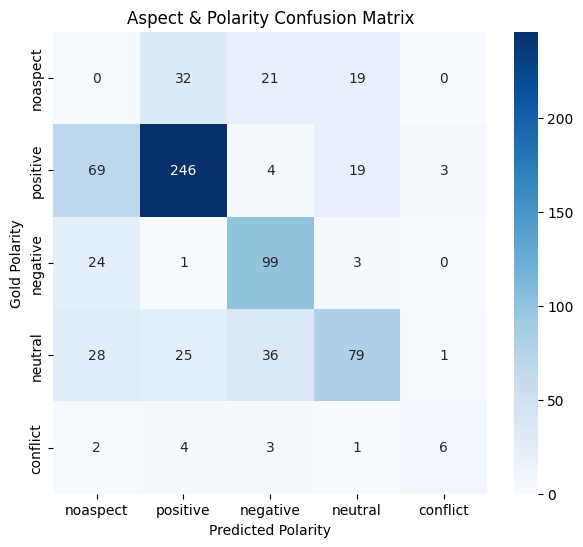

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.ylabel("Gold Polarity")
    plt.xlabel("Predicted Polarity")
    plt.title("Aspect & Polarity Confusion Matrix")
    plt.show()

cm = evaluate_confusion_matrix(dataset["test"], model, tokenizer)
plot_confusion_matrix(cm, labels)
